# Section 2

In [1]:
%run preamble.py
danish = pd.read_csv("../Data/danish.csv").x

# Descriptive statistics , histogram and boxplot

In [2]:
print(danish.describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &            x \\
\midrule
count &  2492.000000 \\
mean  &     3.062699 \\
std   &     7.976703 \\
min   &     0.313404 \\
25\%   &     1.157184 \\
50\%   &     1.633858 \\
75\%   &     2.645484 \\
max   &   263.250366 \\
\bottomrule
\end{tabular}



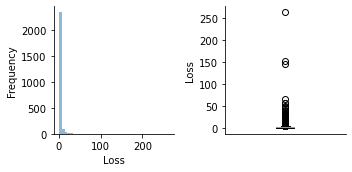

In [3]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(5, 2.5))
num_bins = 40
# the histogram of the data
n, bins, patches = axs[0].hist(danish, num_bins, alpha=0.5)
axs[1].boxplot(danish)
axs[0].set_xlabel("Loss")
axs[0].set_ylabel("Frequency")
axs[1].set_ylabel("Loss")
axs[1].set_xticks([])
# plt.show()
sns.despine()
plt.savefig("../Figures/hist_boxplot_danish_en.pdf")

# Maximum likelihood estimation of common loss distributions

## Fitting the gamma distribution

      shape    scale           AIC           BIC
0  1.257994  2.43459  10490.053765  10501.695447


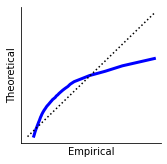

In [4]:
np.random.seed(333)
r, m, BIC, AIC = infer_gamma(danish, (1,1))
fit_gamma = pd.DataFrame({'shape': np.array([r]), "scale": np.array([m]), "AIC":np.array([AIC]), "BIC":np.array([BIC]) })
print(fit_gamma)
X0 = np.random.gamma(shape = r, scale  = m, size=100000)
# print(X0)
qq_plot_en(danish, X0, "blue")
sns.despine()
plt.savefig("../Figures/QQplot_gamma_en.pdf")

## Fitting the lognormal distribution

      shape     scale          AIC          BIC
0  0.671854  0.732317  8871.781777  8883.423459


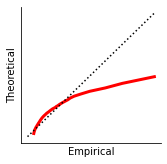

In [5]:
np.random.seed(333)
μ, σ, BIC, AIC = infer_lnorm(danish)
fit_lnorm = pd.DataFrame({'shape': np.array([σ]), "scale": np.array([μ]),"AIC":np.array([AIC]),"BIC":np.array([BIC])  })
print(fit_lnorm)
X0 = np.random.lognormal(mean = μ, sigma  = σ, size=100000)
qq_plot_en(danish, X0, "red")
sns.despine()
plt.savefig("../Figures/QQplot_lnorm_en.pdf")

## Fitting the Weibull distribution

      shape     scale           AIC           BIC
0  0.947587  2.952484  10544.941033  10556.582715


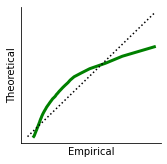

In [6]:
np.random.seed(333)
k, β, BIC, AIC = infer_weib(danish, (1,1))
fit_weibull = pd.DataFrame({'shape': np.array([k]), "scale": np.array([β]), "AIC":np.array([AIC]), "BIC":np.array([BIC]) })
print(fit_weibull)
X0 = np.random.weibull(k, size=100000)* β
qq_plot_en(danish, X0, "green")
sns.despine()
plt.savefig("../Figures/QQplot_weib_en.pdf")

## Fitting the Pareto distribution

      shape     scale           AIC          BIC
0  0.313404  0.545817  11354.188278  11365.82996


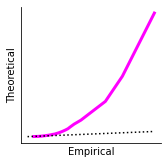

In [7]:
np.random.seed(333)
θ, α, BIC, AIC = infer_par(danish)
fit_pareto = pd.DataFrame({'shape': np.array([θ]), "scale": np.array([α]), "AIC":np.array([AIC]), "BIC":np.array([BIC]) })
print(fit_pareto)
X0 = θ * np.exp(np.random.exponential(size=100000 )/ α)
qq_plot_en(danish, X0, "magenta")
sns.despine()
plt.savefig("../Figures/QQplot_pareto_en.pdf")

# Maximum likelihood estimation of composite models

## Fitting the gamma-Pareto model

       shape      tail     thres          AIC          BIC
0  35.692752  1.312986  1.155785  7723.681774  7741.144297


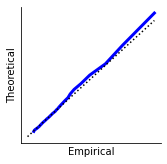

In [8]:
np.random.seed(333)
K = 100000
parms, BIC, AIC = mle_composite(danish, (1,1,1), "gam-par")
fit_gam_par = pd.DataFrame(np.append(parms, [AIC, BIC])).T
fit_gam_par.columns = ["shape", "tail", "thres", "AIC","BIC"]
print(fit_gam_par)
X0 = sim_gam_par(K, parms[0], parms[1], parms[2])
qq_plot_en(danish, X0, "blue")
sns.despine()
plt.savefig("../Figures/QQplot_gam_par_en.pdf")

## Fitting the Weibull-Pareto model

       shape      tail     thres         AIC          BIC
0  14.033784  1.261477  1.002991  7686.75154  7704.214063


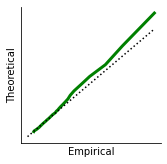

In [9]:
np.random.seed(333)
parms, BIC, AIC = mle_composite(danish, (1,1,1), "wei-par")
fit_wei_par = pd.DataFrame(np.append(parms, [AIC, BIC])).T
fit_wei_par.columns = ["shape", "tail", "thres", "AIC","BIC"]
print(fit_wei_par)
X0 = sim_wei_par(K, parms[0], parms[1], parms[2])
qq_plot_en(danish, X0, "green")
sns.despine()
plt.savefig("../Figures/QQplot_wei_par_en.pdf")

## Fitting the lognormal-Pareto

      shape      tail    thres          AIC          BIC
0  0.196517  1.328223  1.20743  7737.728264  7755.190787


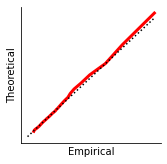

In [10]:
np.random.seed(333)
parms, BIC, AIC = mle_composite(danish, (0.5,1,1), "lnorm-par")
fit_lnorm_par = pd.DataFrame(np.append(parms, [AIC, BIC])).T
fit_lnorm_par.columns = ["shape", "tail", "thres", "AIC","BIC"]
print(fit_lnorm_par)
X0 = sim_lnorm_par(K, parms[0], parms[1], parms[2])
qq_plot_en(danish, X0, "red")
sns.despine()
plt.savefig("../Figures/QQplot_lnorm_par_en.pdf")